In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
from funciones import tipo_transferencia, cantidad_producto

transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [ ]:
#                   VISUALIZACION       DE      PLOT    A   ELECCION

In [ ]:
#                   VISUALIZACION       DE      PIEPLOT

In [2]:
analisis = transactions[["target", "ammount", "product_category"]]

In [3]:
analisis = analisis.rename(columns={"target":"Transferencia", "ammount":"Monto en $", "product_category":"Tipo de producto"})

In [4]:
analisis["Transferencia"] = analisis["Transferencia"].map(tipo_transferencia)

In [5]:
analisis["Cantidad"] = analisis["Tipo de producto"].map(cantidad_producto)

In [6]:
analisis

,Transferencia,Monto en $,Tipo de producto,Cantidad
0,Legal,68.50,W,1
1,Legal,29.00,W,1
2,Legal,59.00,W,1
3,Legal,50.00,W,1
4,Legal,50.00,H,1
...,...,...,...,...
501954,Legal,29.00,W,1
501955,Legal,312.95,W,1
501956,Legal,774.00,W,1
501957,Legal,226.00,W,1


In [7]:
analisis_cantidad = analisis.pivot_table(values="Cantidad", index="Tipo de producto", columns="Transferencia", aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_10600\970043778.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis_cantidad = analisis.pivot_table(values="Cantidad", index="Tipo de producto", columns="Transferencia", aggfunc=sum)


In [8]:
analisis_cantidad["Cantidad de fraude en %"] = round(analisis_cantidad.Fraude * 100 / analisis_cantidad.Fraude.sum())

In [9]:
analisis_cantidad = analisis_cantidad.reset_index()

In [10]:
analisis_cantidad = analisis_cantidad.rename(columns={"Fraude":"Cantidad de fraude", "Legal":"Cantidad de legal"})

In [11]:
analisis_cantidad

Transferencia,Tipo de producto,Cantidad de fraude,Cantidad de legal,Cantidad de fraude en %
0,C,6738,52393,38.0
1,H,1410,29052,8.0
2,R,1214,32295,7.0
3,S,542,8113,3.0
4,W,7676,362526,44.0


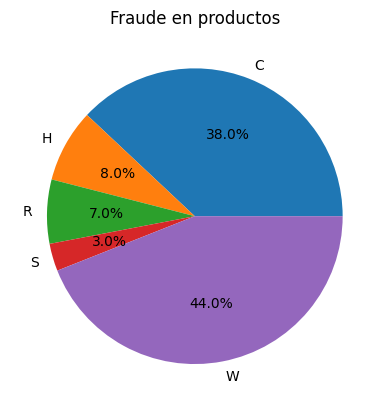

In [12]:
plt.subplots()[1].pie(analisis_cantidad["Cantidad de fraude en %"], labels=analisis_cantidad["Tipo de producto"], autopct='%1.1f%%')
plt.title("Fraude en productos")
plt.show()

In [13]:
analisis_monto = analisis.pivot_table(values="Monto en $", index="Tipo de producto", columns="Transferencia", aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_10600\1936693962.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis_monto = analisis.pivot_table(values="Monto en $", index="Tipo de producto", columns="Transferencia", aggfunc=sum)


In [ ]:
#                   VISUALIZACION       DE      BARPLOT

In [14]:
analisis_monto = analisis_monto.reset_index()

In [15]:
analisis_monto = analisis_monto.rename(columns={"Fraude":"Monto en $"})

In [16]:
analisis_monto.pop("Legal")

0    2.227830e+06
1    1.986435e+06
2    5.424125e+06
3    4.278471e+05
4    5.490972e+07
Name: Legal, dtype: float64

In [17]:
analisis_monto["Monto en $"] = round(analisis_monto["Monto en $"] / 1000)

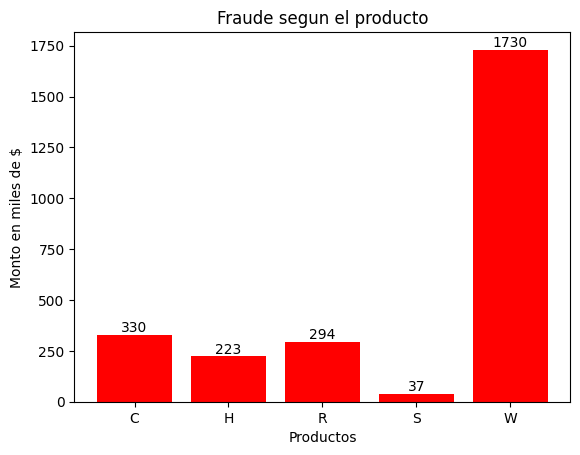

In [18]:
fraude = plt.bar(analisis_monto["Tipo de producto"], analisis_monto["Monto en $"], color="red")
plt.title("Fraude segun el producto")
plt.xlabel("Productos")
plt.ylabel("Monto en miles de $")
plt.bar_label(fraude)
plt.show()